In [1]:
using Distributions, Gadfly
set_default_plot_size(24cm, 16cm)

In [2]:
k = 10
n = Normal(0, 10)
qa = rand(n, k)
bandits = map(q -> Normal(q, 10), qa)

10-element Array{Distributions.Normal,1}:
 Distributions.Normal(μ=22.103646119538432, σ=10.0) 
 Distributions.Normal(μ=6.426945735492989, σ=10.0)  
 Distributions.Normal(μ=6.506007363570916, σ=10.0)  
 Distributions.Normal(μ=-3.63799807476125, σ=10.0)  
 Distributions.Normal(μ=9.843076077964515, σ=10.0)  
 Distributions.Normal(μ=24.452359652144338, σ=10.0) 
 Distributions.Normal(μ=-20.965411366682783, σ=10.0)
 Distributions.Normal(μ=13.725615385826394, σ=10.0) 
 Distributions.Normal(μ=-15.13394654684804, σ=10.0) 
 Distributions.Normal(μ=7.593499964437026, σ=10.0)  

In [3]:
μ_star, a_star = findmax(qa)

(24.452359652144338,6)

In [4]:
bandit(n) = rand(bandits[n])

bandit (generic function with 1 method)

In [5]:
bandit(a_star)

10.276183632772238

In [6]:
function greedy(T = 1000)
    R = zeros(Float64, T)
    A = Array(Int, T)

    rewards = zeros(Float64, k)
    
    for t=1:T
        _, i = findmax(rewards)
        r = bandit(i)
        rewards[i] += r
        R[t] = r
        A[t] = i
    end

    (A, R)
end

greedy (generic function with 2 methods)

In [7]:
A_greedy, R_greedy = greedy()
println("Greedy: action = ", A_greedy[end], ", total reward = ", sum(R_greedy))

Greedy: action = 1, total reward = 22179.810129637524


In [8]:
function ϵgreedy(ϵ, T = 1000)
    R = zeros(Float64, T)
    A = Array(Int, T)

    rewards = zeros(Float64, k)
    xx = Bernoulli(ϵ)
    xa = DiscreteUniform(1, k)
    
    exploit() = findmax(rewards)[2]
    explore() = rand(xa)

    for t=1:T
        i = rand(xx) == 0 ? exploit() : explore()
        r = bandit(i)
        rewards[i] += r
        R[t] = r
        A[t] = i
    end
    
    (A, R)
end

ϵgreedy (generic function with 2 methods)

In [9]:
A_ϵgreedy, R_ϵgreedy = ϵgreedy(0.1)
println("ϵ-Greedy [ϵ = 0.1]: action = ", A_ϵgreedy[end], ", total reward = ", sum(R_ϵgreedy))

ϵ-Greedy [ϵ = 0.1]: action = 1, total reward = 20423.92519556702


In [10]:
A_ϵgreedy001, R_ϵgreedy001 = ϵgreedy(0.01)
println("ϵ-Greedy [ϵ = 0.01]: action = ", A_ϵgreedy001[end], ", total reward = ", sum(R_ϵgreedy001))

ϵ-Greedy [ϵ = 0.01]: action = 1, total reward = 21623.27983725886


In [11]:
R_greedy_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = greedy()
    R_greedy_avg += R
end

R_greedy_avg /= 2000

1000-element Array{Float64,1}:
 22.3182
 21.8987
 22.066 
 21.8585
 21.6948
 22.1247
 21.6803
 21.5808
 22.1133
 22.1004
 21.6212
 22.11  
 22.3307
  ⋮     
 21.9568
 21.9315
 21.9846
 21.6056
 22.2209
 22.1525
 21.5427
 22.1839
 22.2483
 22.3592
 21.8769
 21.9146

In [12]:
R_ϵgreedy_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0.1)
    R_ϵgreedy_avg += R
end

R_ϵgreedy_avg /= 2000

1000-element Array{Float64,1}:
 20.7148
 19.4736
 19.8202
 19.8242
 20.0178
 19.7392
 19.5658
 19.5501
 19.8941
 19.8196
 20.0882
 19.9046
 20.2119
  ⋮     
 20.1447
 19.66  
 19.2439
 19.7511
 19.7615
 19.7575
 19.5545
 19.9224
 20.3692
 20.0326
 20.0085
 19.7161

In [13]:
R_ϵgreedy001_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0.01)
    R_ϵgreedy001_avg += R
end

R_ϵgreedy001_avg /= 2000

1000-element Array{Float64,1}:
 22.3608
 21.4587
 21.8276
 21.4192
 21.6113
 21.1967
 21.9127
 21.7785
 21.3272
 21.4199
 21.4026
 21.0809
 22.0852
  ⋮     
 21.4448
 22.0833
 21.7849
 21.4431
 21.1754
 21.3497
 21.5962
 21.5013
 21.3953
 21.6143
 21.5548
 22.0029

In [14]:
rplot(n = 1000) = plot(layer(x = 1:n, y = R_greedy_avg[1:n], color = fill("Greedy", n), Geom.line),
    layer(x = 1:n, y = R_ϵgreedy_avg[1:n], color = fill("ϵ-Greedy [ϵ = 0.1]", n), Geom.line),
    layer(x = 1:n, y = R_ϵgreedy001_avg[1:n], color = fill("ϵ-Greedy [ϵ = 0.01]", n), Geom.line),
    Theme(key_position=:bottom))

rplot (generic function with 2 methods)

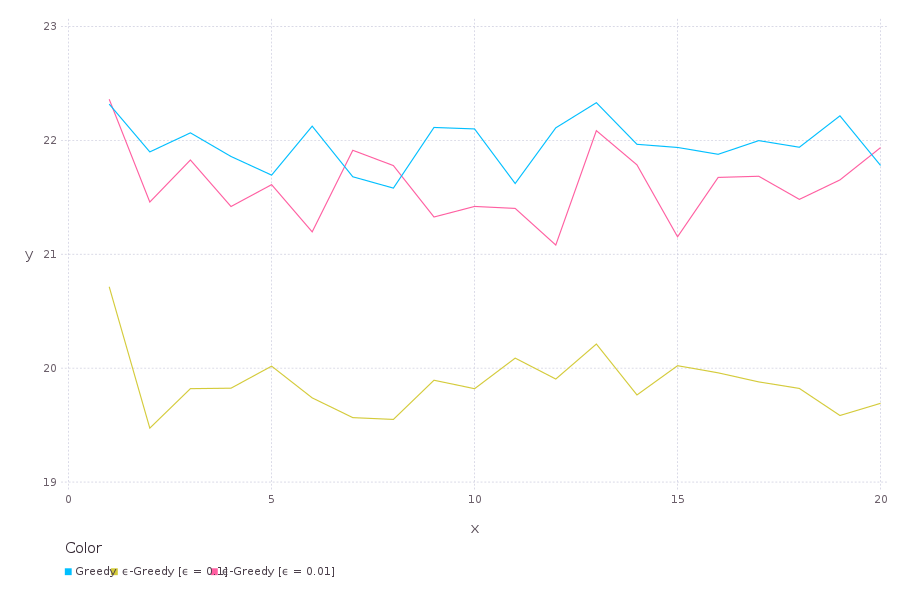

In [15]:
rplot(20)